In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
fraud = pd.read_csv("Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
# Checking for null values
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
# Creating dummy vairables for Categorical columns
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [6]:
# Creating new column TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [7]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,False,False,True,True,Good
1,33700,134075,18,True,False,False,True,Good
2,36925,160205,30,False,True,False,True,Good
3,50190,193264,15,True,False,True,True,Good
4,81002,27533,28,False,True,False,False,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,True,False,False,True,Good
596,69967,55369,2,True,False,False,True,Good
597,47334,154058,0,False,False,False,True,Good
598,98592,180083,17,True,True,False,False,Good


### Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [8]:
# Creating a new column
fraud = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)

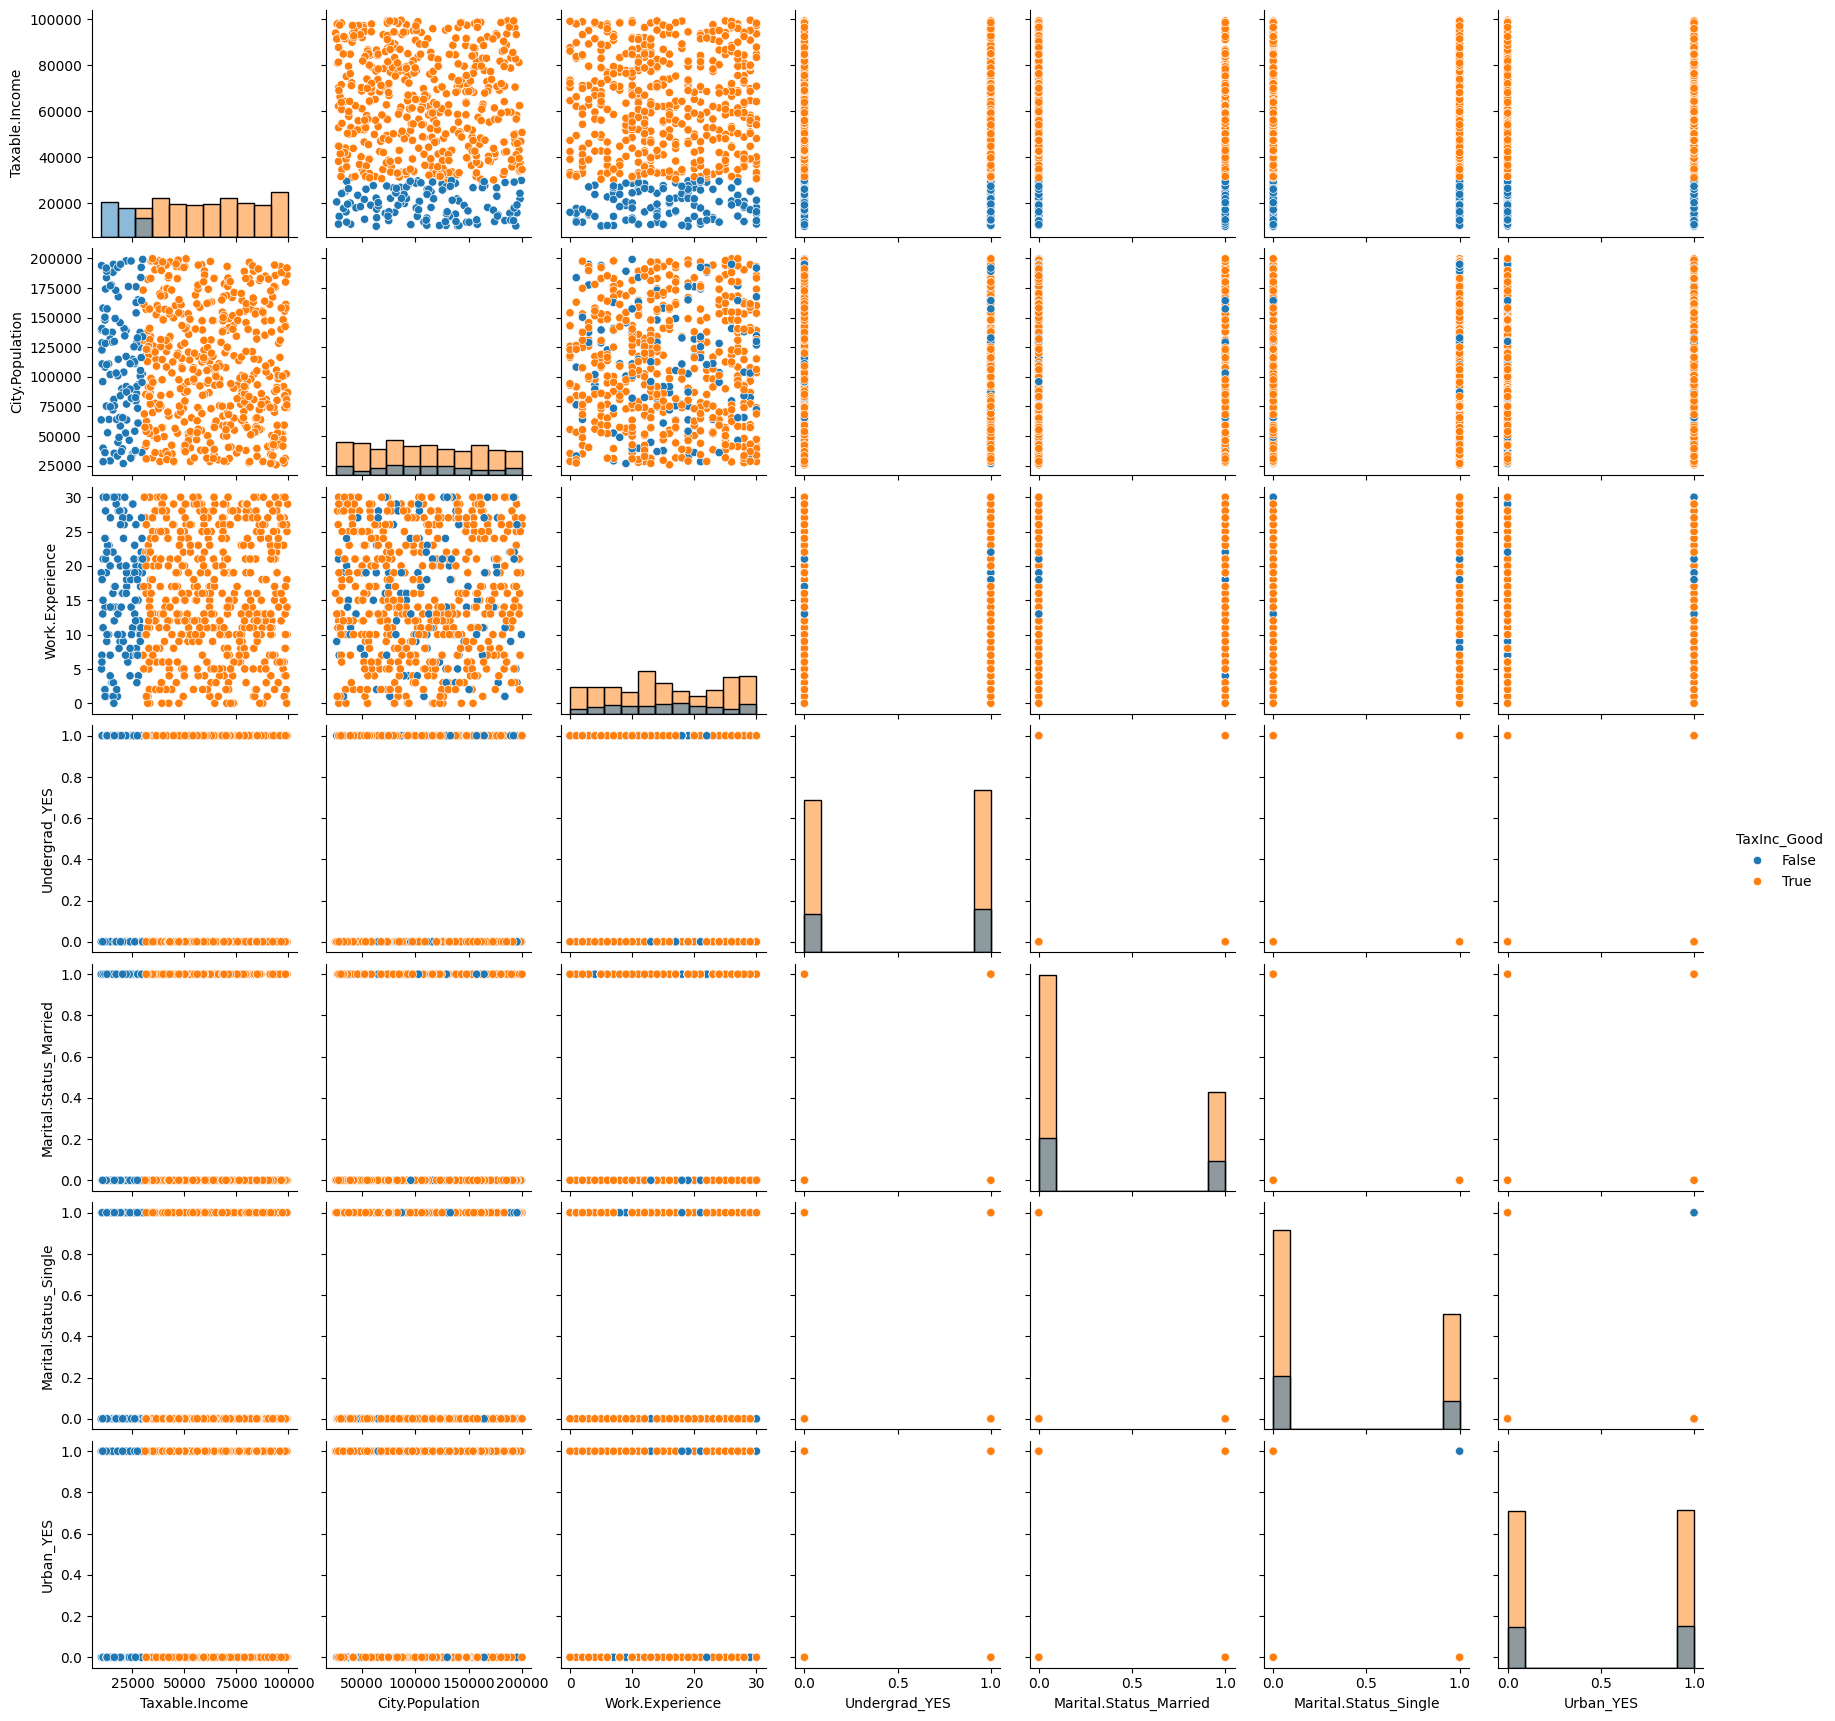

In [9]:
# Pairplot
sns.pairplot(data=fraud, hue = 'TaxInc_Good', diag_kind="hist")

In [10]:
# Defining Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [15]:
# Normaliizng  the data
fraud_norm = fraud.iloc[-10:] ^ True
print(fraud_norm)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
590            True             True             True           True   
591            True             True             True          False   
592            True             True             True          False   
593            True             True             True           True   
594            True             True             True           True   
595            True             True             True          False   
596            True             True             True          False   
597            True             True             True           True   
598            True             True             True          False   
599            True             True             True           True   

     Marital.Status_Married  Marital.Status_Single  Urban_YES  TaxInc_Good  
590                   False                   True      False        False  
591                    True                  False   

In [16]:
# Declaring features & target
X = fraud_norm.drop(['TaxInc_Good'], axis=1)
y = fraud_norm['TaxInc_Good']

In [17]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Converting the Taxable income variable to bucketing. 
fraud_norm["income"]="<=30000"
fraud_norm.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud_norm.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [19]:
# Droping the Taxable income column
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

In [20]:
# Renaming the column
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [21]:
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [22]:
# Splitting the data into featuers and labels
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [23]:
# Collecting the column names
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [24]:
# Splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [25]:
# Creating Model
model = RandomForestClassifier(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [32]:
model.estimators_
model.classes_
# model.n_features_
model.n_classes_

2

In [33]:
model.n_outputs_

1

In [34]:
model.oob_score_
# 74.7833%

0.5354166666666667

In [35]:
# Predictions
prediction = model.predict(x_train)

In [36]:
# Accuracy 
accuracy = accuracy_score(y_train,prediction)
# 98.33%

In [37]:
np.mean(prediction == y_train)
# 98.33%

0.9895833333333334

In [38]:
# Confusion matrix
confusion = confusion_matrix(y_train,prediction)

In [39]:
# Prediction
pred_test = model.predict(x_test)

In [40]:
# Accuracy
acc_test =accuracy_score(y_test,pred_test)
# 78.333%

In [41]:
# Plotting a Decision tree present in Random forest
tree = model.estimators_[5]

In [46]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


^
  (at char 0), (line:1, col:1)


### Building Decision Tree Classifier using Entropy Criteria

In [47]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [48]:
from sklearn import tree

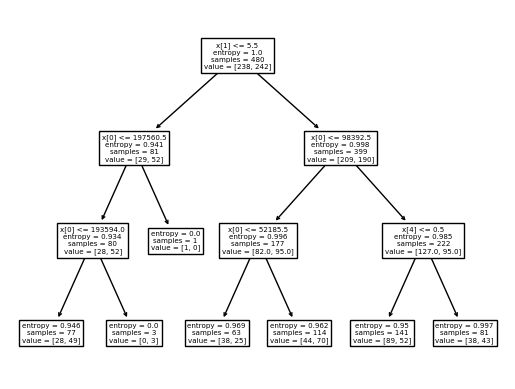

In [49]:
# PLotting the decision tree
tree.plot_tree(model);

In [50]:
colnames = list(fraud.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

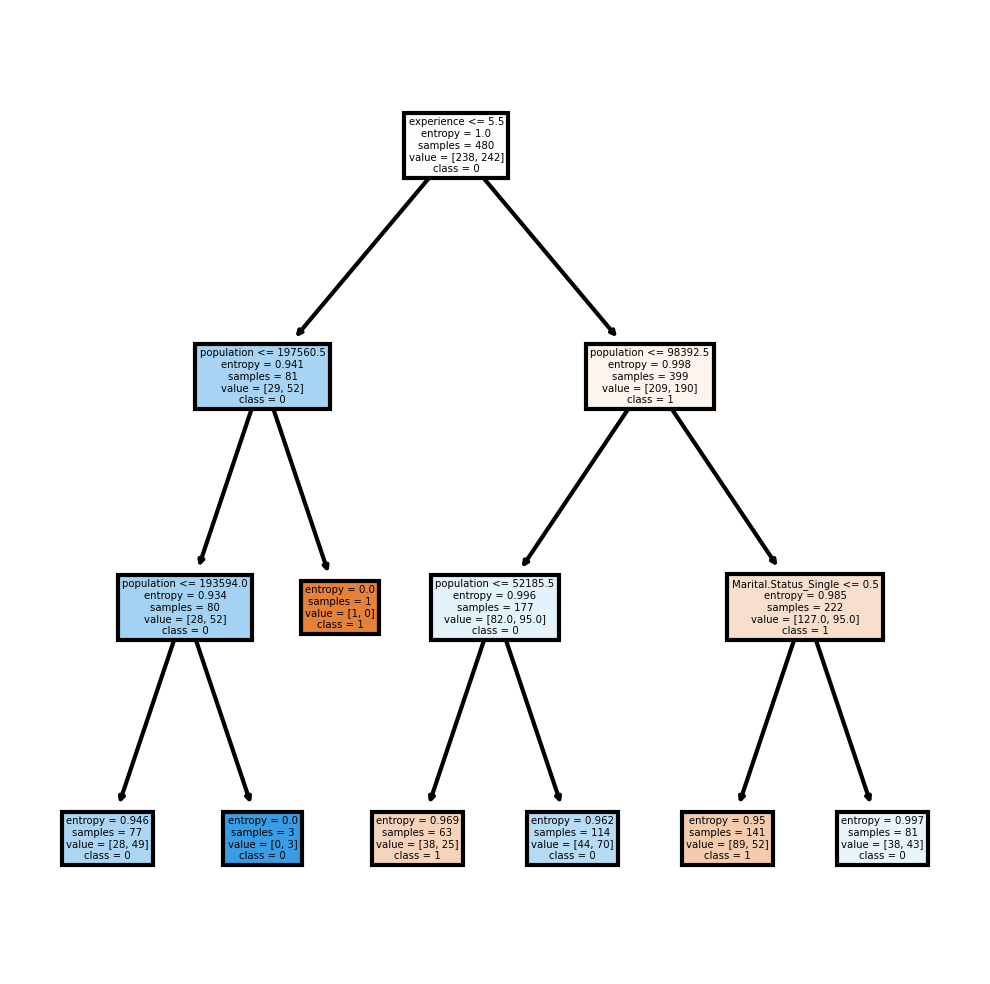

In [51]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [52]:
# Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

True     69
False    51
Name: count, dtype: int64

In [53]:
preds

array([False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False,  True, False,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
        True, False,  True, False,  True, False, False,  True, False,
       False,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False, False, False,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True, False])

In [54]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,False,True
Urban_YES,,
False,26,34
True,25,35


In [55]:
# Accuracy 
np.mean(preds==y_test)

0.5083333333333333

### Building Decision Tree Classifier (CART) using Gini Criteria

In [56]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [57]:
# Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5083333333333333

### Decision Tree Regression

In [58]:
array = fraud.values
X = array[:,0:3]
y = array[:,3]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [60]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [61]:
# Checking the accuracy
model.score(X_test,y_test)

-0.8701026119402988